## ***one_sub***
#### <font color = grey> training and testing a linear support vector machine on its ability to predict auditory verbal hallucination states in a **single subject** with schizophrenia </font>

In [1]:
import os
import numpy as np
import nibabel as nib
import nilearn
import matplotlib.pyplot as plt

from nilearn import image
from nilearn.image import mean_img
from nilearn import plotting
from nilearn.plotting import plot_epi
from scipy import stats
from nilearn.maskers import NiftiMasker

In [2]:
print("Changing cwd to 'Paris'...")
os.chdir("..")
os.getcwd()

Changing cwd to 'Paris'...


'/Users/grantgonsalves/Desktop/gmg2176/Paris'

Loading subject data...

Dimensions of functional image:
(60, 44, 50, 280)

Visualizing mean functional image...



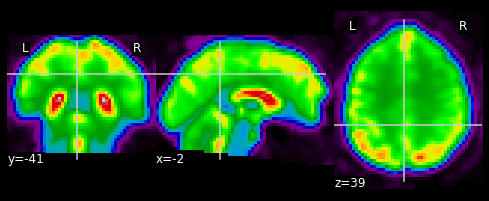

In [3]:
# labels are in the format of S01labels.npy in "hallu"
# functional images are in the format of S01_func.nii in "S01" in "Data"
# anatomical images are in the format of S01_anat.nii in "S01" in "Data"

print("Loading subject data...\n")
os.chdir("hallu/Data/S01")
S01_func = nib.load("S01_func.nii")
S01_data = S01_func.get_fdata()

print("Dimensions of functional image:")
print(S01_func.shape)

print("\nVisualizing mean functional image...\n")
plotting.plot_epi(mean_img(S01_func));

Making mask...



/Users/grantgonsalves/opt/anaconda3/lib/python3.8/site-packages/nilearn/plotting/displays/_slicers.py:1318: UserWarning: A non-diagonal affine is found in the given image. Reordering the image to get diagonal affine for finding cuts in the slices.
  cut_coords = find_cut_slices(img,


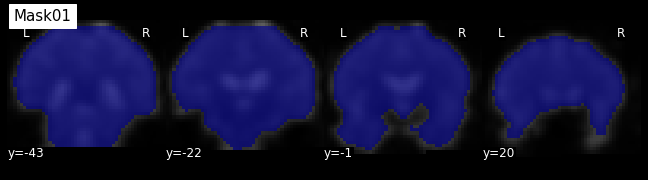

In [4]:
print("Making mask...\n")
masker = NiftiMasker(standardize=True, mask_strategy='epi')
masker.fit(S01_func)
mask01 = masker.mask_img_
mean01 = mean_img(S01_func)
plotting.plot_roi(mask01, mean01, display_mode='y', cut_coords=4, title="Mask01");

In [5]:
print ("Overlaying mask...\n")
report = masker.generate_report()
report

Overlaying mask...



Parameter,Value
detrend,False
dtype,None
high_pass,None
high_variance_confounds,False
low_pass,None
mask_args,None
mask_img,None
mask_strategy,epi
memory,Memory(location=None)
memory_level,1


In [6]:
print("Changing cwd to 'hallu'...")
os.chdir("../..")
os.getcwd()

Changing cwd to 'hallu'...


'/Users/grantgonsalves/Desktop/gmg2176/Paris/hallu'

In [7]:
print("Loading AVH labels...\n (0=rest;1=on;2=off) \n")
S01labels=np.load("S01labels.npy")

print(S01labels)

Loading AVH labels...
 (0=rest;1=on;2=off) 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 0 0 1 1 1 1 1 1 1 1 0 0
 2 2 2 2 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 2 2 2 2 2 2 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 2 2 2 2 2 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]


In [8]:
print("Replacing 'rest' labels with 'off' labels...")

S01labels = np.where(S01labels == 0, 2, S01labels)
S01labels

Replacing 'rest' labels with 'off' labels...


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2], dtype=int32)

In [9]:
print("Training decoder to predict labels...")
from nilearn.image import index_img

f_train = index_img(S01_func, slice(0,-30))
f_test = index_img(S01_func, slice(-30,None))
c_train = S01labels[:-30]
c_test = S01labels[-30:]

print("Testing decoder against unseen data...")
from nilearn.decoding import Decoder
decoder = Decoder(estimator='svc', mask=mask01, standardize=True)
decoder.fit(f_train, c_train, groups=None)

prediction = decoder.predict(f_test)
print("Prediction Accuracy: {:.3f}".format(
    (prediction == c_test).sum() / float(len(c_test))))

Training decoder to predict labels...
Testing decoder against unseen data...
Prediction Accuracy: 0.867


In [10]:
print("Spliting dataset into folds for cross-validation...")

from sklearn.model_selection import KFold
cv = KFold(n_splits=5)
fold = 0
for train, test in cv.split(S01labels):
    fold += 1
    decoder = Decoder(estimator='svc', mask=mask01, standardize=True)
    decoder.fit(index_img(S01_func, train), S01labels[train])
    prediction = decoder.predict(index_img(S01_func, test))
    print(
        "CV Fold {:01d} | Prediction Accuracy: {:.3f}".format(
            fold,
            (prediction == S01labels[test]).sum() / float(len(
                S01labels[test]))))

Spliting dataset into folds for cross-validation...
CV Fold 1 | Prediction Accuracy: 0.518
CV Fold 2 | Prediction Accuracy: 0.857
CV Fold 3 | Prediction Accuracy: 0.536
CV Fold 4 | Prediction Accuracy: 0.964
CV Fold 5 | Prediction Accuracy: 0.839


In [11]:
print("Making pipeline...\n")

from sklearn.svm import SVC
svc = SVC(kernel='linear', decision_function_shape='ovo', probability=True, C=1)

from sklearn.feature_selection import SelectKBest, f_classif
feature_selection = SelectKBest(f_classif, k=1000)

from sklearn.pipeline import Pipeline
anova_svc = Pipeline([('anova', feature_selection), ('svc', svc)])

trans01 = masker.transform(S01_func)
nb_samples = len(trans01)//2
shuff_idx  = np.random.permutation(np.arange(len(trans01)))
anova_svc.fit(trans01[shuff_idx][:nb_samples], S01labels[shuff_idx][:nb_samples])

print("Cross-validating...")
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(anova_svc, trans01, S01labels, cv=cv, n_jobs=4) 
classification_accuracy = np.mean(cv_scores)

from sklearn.dummy import DummyClassifier
null_cv_scores = np.mean(cross_val_score(DummyClassifier(), trans01, S01labels, cv=cv, n_jobs=4))

print("\nClassification Accuracy:")
print(classification_accuracy)
print("\nNull CV Scores:")
print(null_cv_scores)

Making pipeline...

Cross-validating...

Classification Accuracy:
0.7785714285714287

Null CV Scores:
0.5857142857142856


In [14]:
print("Changing cwd to 'S01'...")
os.chdir("Data/S01")
os.getcwd()

'/Users/grantgonsalves/Desktop/gmg2176/Paris/hallu/Data/S01'

Displaying SVM weights...



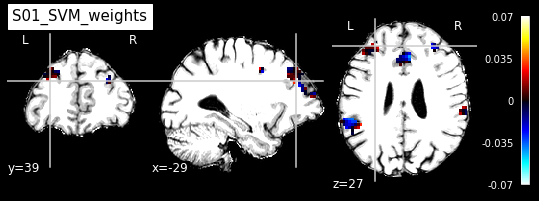

In [17]:
print("Displaying SVM weights...\n")
S01_anat=nib.load("S01_anat.nii")
coef_img = masker.inverse_transform(feature_selection.inverse_transform(svc.coef_))
plotting.plot_stat_map(coef_img, bg_img=S01_anat, title="S01_SVM_weights", colorbar=True, dim=-1);

Displaying contribution map as glass brain...


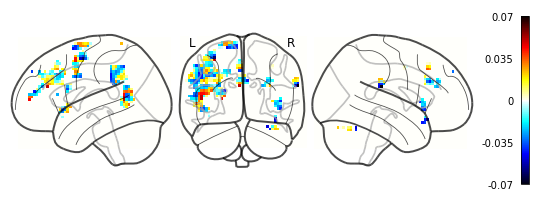

In [18]:
# (?) not sure how too fix axes
print("Displaying contribution map as glass brain...")
plotting.plot_glass_brain(coef_img, display_mode='lyr', threshold=None, 
                          colorbar=True, plot_abs=False, axes=None, 
                          cmap=None, output_file=None);